<a href="https://colab.research.google.com/github/hkrish15/PRODIGY_ML_01/blob/main/ML_ONE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression

train_df = pd.read_csv('train.csv')
print(train_df.size)
print(train_df.shape)

print(train_df.head(3))

118260
(1460, 81)
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  

[3 rows x 81 columns]


In [ ]:
#PRE-PROCESSING

obj = (train_df.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:",len(object_cols))
print(object_cols)

Categorical variables: 43
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [ ]:
fl = (train_df.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:",len(fl_cols))
print(fl_cols)

Float variables: 3
['LotFrontage', 'MasVnrArea', 'GarageYrBlt']


In [ ]:
obj_int =  (train_df.dtypes == 'int')
num_cols = list(obj_int[obj_int].index)
print("Integer variables:",len(num_cols))
print(num_cols)

Integer variables: 35
['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


In [ ]:
# Columns with missing values
import pandas as pd
missing_values = train_df.isnull().sum()

columns_with_missing = missing_values[missing_values > 0]

print("Columns with missing values:")
print(columns_with_missing)
# Percentage of missing values in each column


Columns with missing values:
LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


In [ ]:
missing_percentage = (train_df.isnull().sum() / len(train_df)) * 100

print("Percentage of missing values in each column:")
print(missing_percentage)

Percentage of missing values in each column:
Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
                   ...    
MoSold            0.000000
YrSold            0.000000
SaleType          0.000000
SaleCondition     0.000000
SalePrice         0.000000
Length: 81, dtype: float64


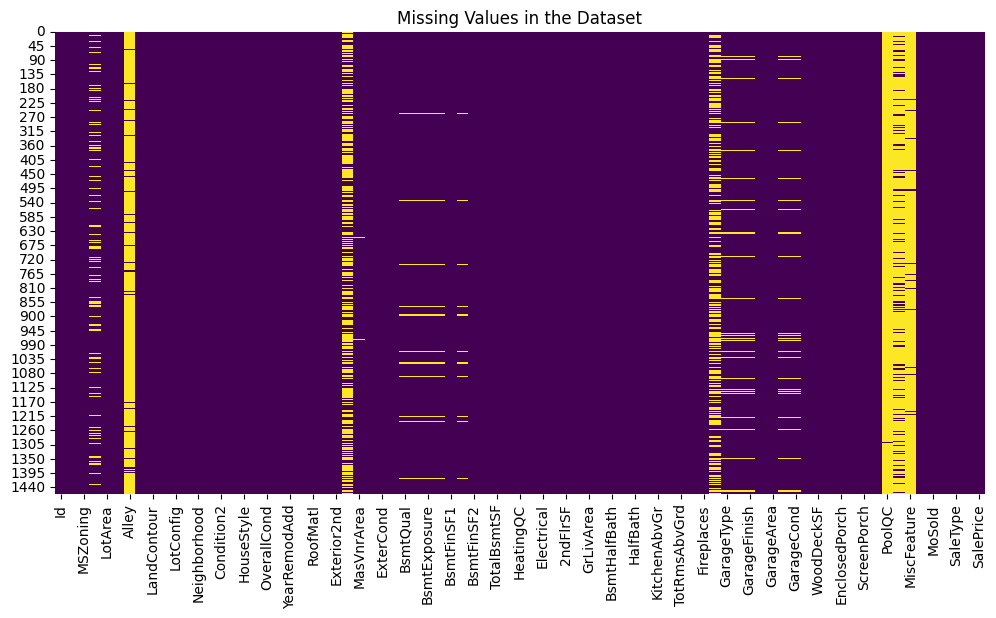

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize missing values
plt.figure(figsize=(12, 6))
sns.heatmap(train_df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values in the Dataset")
plt.show()

In [ ]:
#Since features we are dealing with dosen't have any missing values we are not filling those in other columns

import seaborn as sns
import matplotlib.pyplot as plt

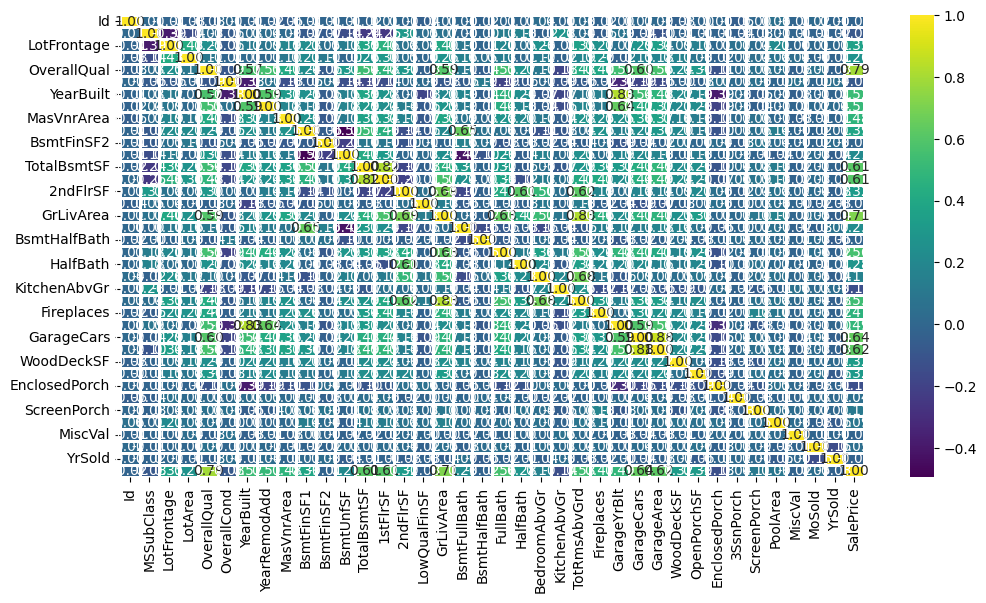

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

numeric_df = train_df.select_dtypes(include=[float, int])
corr_matrix = numeric_df.corr()



plt.figure(figsize=(12, 6))
sns.heatmap(corr_matrix,
            cmap='viridis',
            annot=True,  # Add this to display the correlation values on the heatmap
            fmt='.2f',
            linewidths=2)
plt.show()


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Load the training dataset

# Select the relevant features and the target variable
features = ['GrLivArea', 'BedroomAbvGr', 'FullBath', 'HalfBath']
target = 'SalePrice'

X = train_df[features]
y = train_df[target]

# Create the linear regression model
model = LinearRegression()

# Evaluate the model using cross-validation
mse_scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=10)
r2_scores = cross_val_score(model, X, y, scoring='r2', cv=10)

# Calculate the mean and standard deviation of MSE and R2 scores
mse_mean = -mse_scores.mean()
mse_std = mse_scores.std()
r2_mean = r2_scores.mean()
r2_std = r2_scores.std()

print(f'Mean Squared Error (Cross-Validation): {mse_mean:.2f} ± {mse_std:.2f}')
print(f'R-squared (Cross-Validation): {r2_mean:.2f} ± {r2_std:.2f}')

# Train the model on the full training set
model.fit(X, y)

print("Model training completed.")


Mean Squared Error (Cross-Validation): 2668621916.89 ± 917538808.20
R-squared (Cross-Validation): 0.58 ± 0.08
Model training completed.


In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# Load the testing dataset
test_df = pd.read_csv('test.csv')
features = ['GrLivArea', 'BedroomAbvGr', 'FullBath', 'HalfBath']
X_test = test_df[features]

y_pred = model.predict(X_test)

predicted_df = pd.DataFrame({'Id': test_df['Id'], 'SalePrice': y_pred})

predicted_df.to_csv('test_predictions.csv', index=False)

print("Predictions saved to 'test_predictions.csv'.")
print('SalePrice')

Predictions saved to 'test_predictions.csv'.


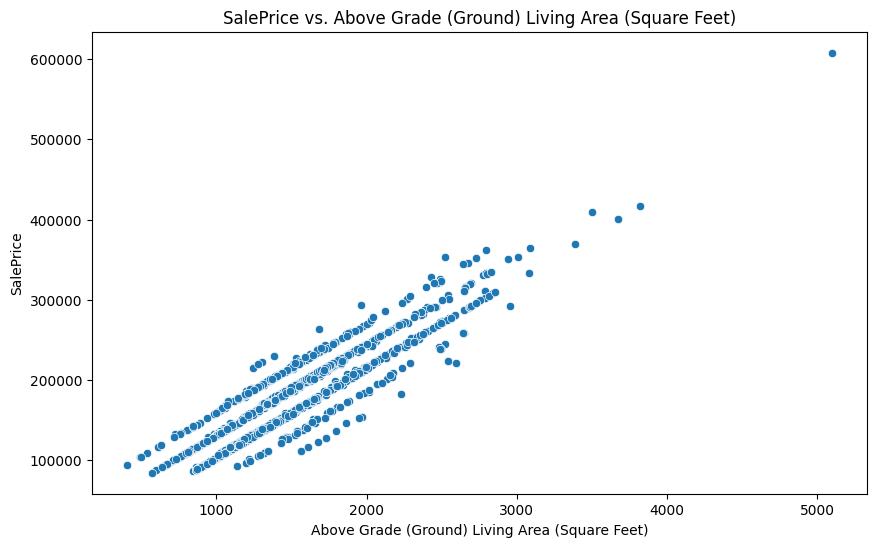

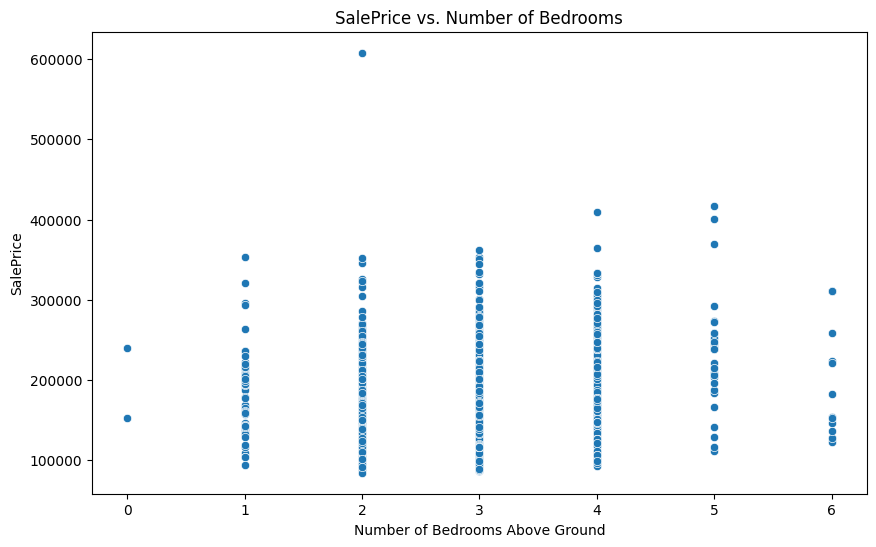

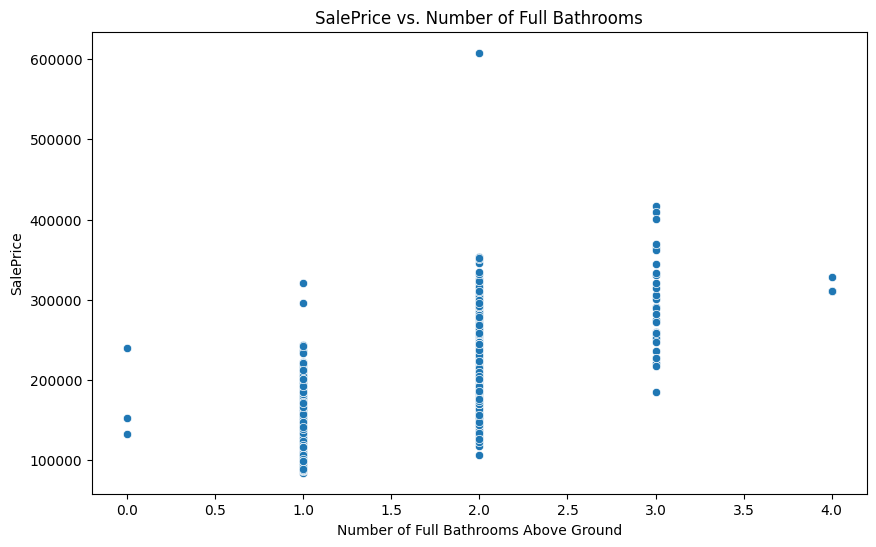

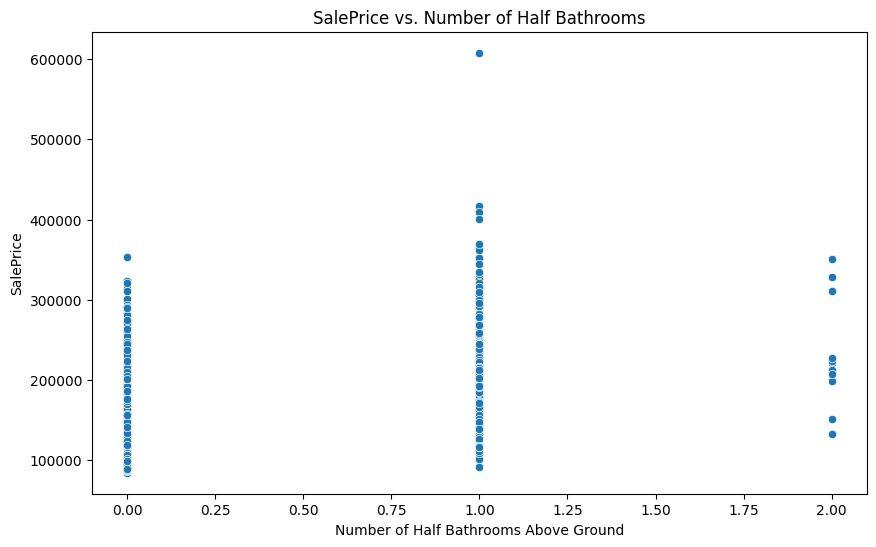

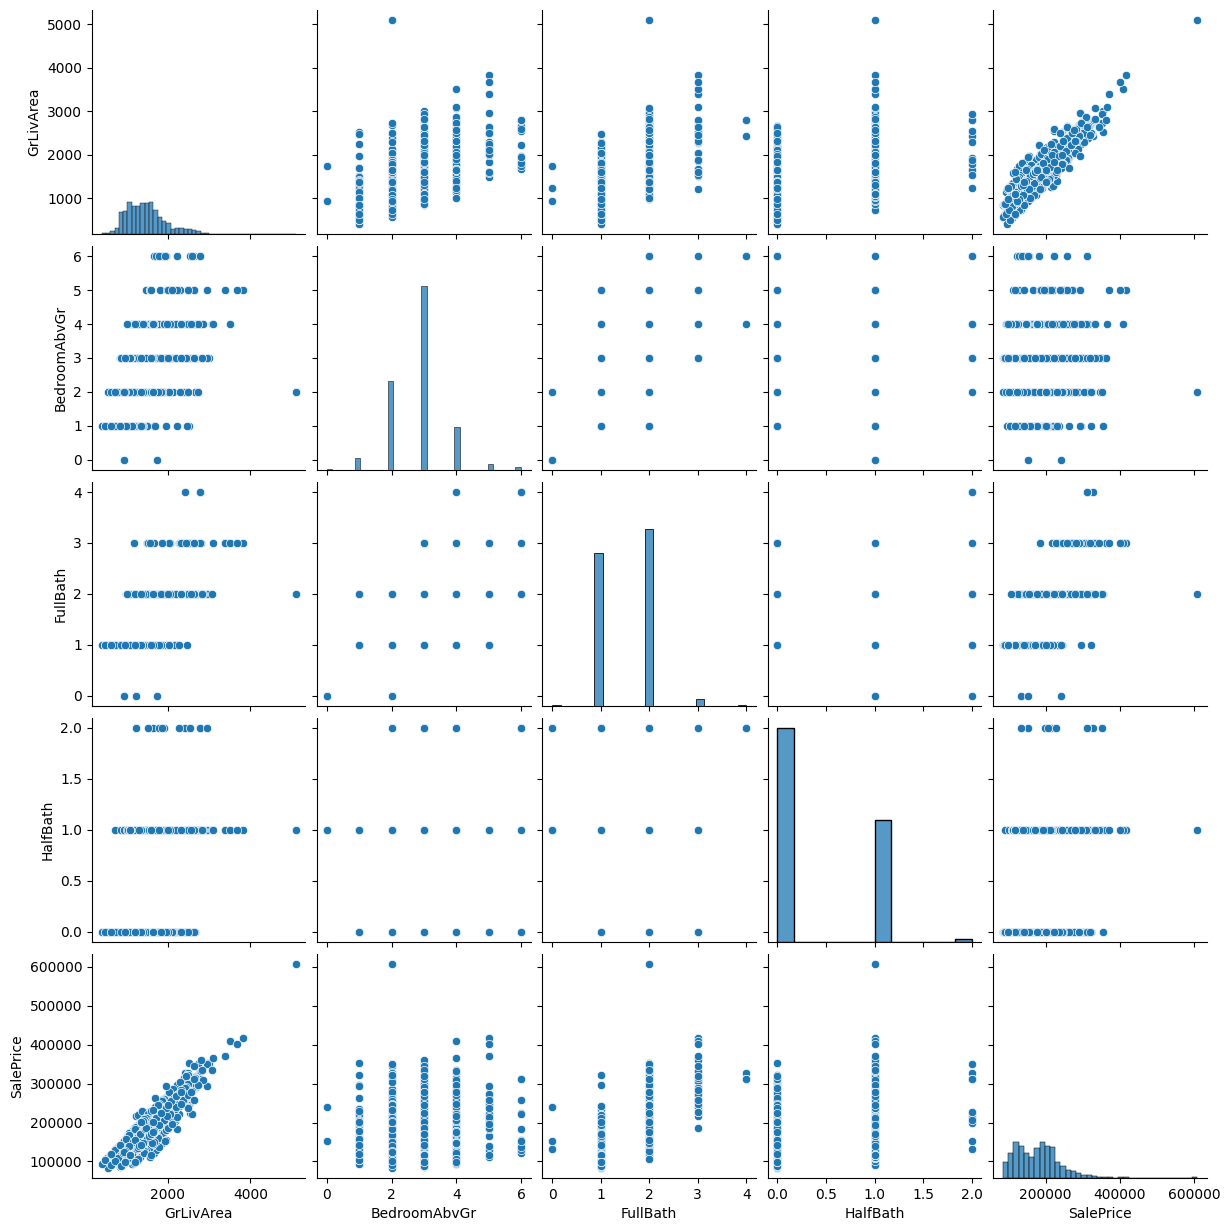

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the test dataset
test_df = pd.read_csv('test.csv')

# Load the predictions
predicted_df = pd.read_csv('test_predictions.csv')

# Merge the test dataset with the predictions
merged_df = pd.merge(test_df, predicted_df, on='Id')

# Ensure columns are present

# Scatter plot of SalePrice vs. GrLivArea
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GrLivArea', y='SalePrice', data=merged_df)
plt.title('SalePrice vs. Above Grade (Ground) Living Area (Square Feet)')
plt.xlabel('Above Grade (Ground) Living Area (Square Feet)')
plt.ylabel('SalePrice')
plt.show()

# Scatter plot of SalePrice vs. BedroomAbvGr
plt.figure(figsize=(10, 6))
sns.scatterplot(x='BedroomAbvGr', y='SalePrice', data=merged_df)
plt.title('SalePrice vs. Number of Bedrooms')
plt.xlabel('Number of Bedrooms Above Ground')
plt.ylabel('SalePrice')
plt.show()

# Scatter plot of SalePrice vs. FullBath
plt.figure(figsize=(10, 6))
sns.scatterplot(x='FullBath', y='SalePrice', data=merged_df)
plt.title('SalePrice vs. Number of Full Bathrooms')
plt.xlabel('Number of Full Bathrooms Above Ground')
plt.ylabel('SalePrice')
plt.show()

# Scatter plot of SalePrice vs. HalfBath
plt.figure(figsize=(10, 6))
sns.scatterplot(x='HalfBath', y='SalePrice', data=merged_df)
plt.title('SalePrice vs. Number of Half Bathrooms')
plt.xlabel('Number of Half Bathrooms Above Ground')
plt.ylabel('SalePrice')
plt.show()

# Pairplot to visualize relationships between features and SalePrice
sns.pairplot(merged_df, vars=['GrLivArea', 'BedroomAbvGr', 'FullBath', 'HalfBath', 'SalePrice'])
plt.show()
